# IS362 Final Project

## Importing all necessary libraries

In [63]:
# Import pandas and numpy
import pandas as pd
import numpy as np
%matplotlib inline

## Loading dataset

In [62]:
df = pd.read_csv('/Users/vguan/Documents/SPS/IS362/Final Project/heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


## Selecting Columns 

In [64]:
data_cat = df[['HeartDisease','Age', 'Sex', 'ChestPainType','ExerciseAngina']]
data_cat.head(10)

,HeartDisease,Age,Sex,ChestPainType,ExerciseAngina
0,0,40,M,ATA,N
1,1,49,F,NAP,N
2,0,37,M,ATA,N
3,1,48,F,ASY,Y
4,0,54,M,NAP,N
5,0,39,M,NAP,N
6,0,45,F,ATA,N
7,0,54,M,ATA,N
8,1,37,M,ASY,Y
9,0,48,F,ATA,N


## Checking if there is any null value

In [8]:
data_cat.isnull().sum()

HeartDisease      0
Age               0
Sex               0
ChestPainType     0
ExerciseAngina    0
dtype: int64

## Fields information

### Heart Disease: Yes = 1 , No = 0

### Age

### Sex: Male(M) = 0, Female(F) = 1

### ChestPainType: Typical Angina (TA)=0, Atypical Angina (ATA)=1, Non-Anginal Pain (NA)=2, Asymptomatic(ASY)=3

### ExerciseAngina: (Exercise Induce Angina) Yes=1, No=0

## Changing to Numeric Values

In [11]:
data_num =data_cat.replace({'Sex':{'M':0,'F':1},'ChestPainType':{'TA':0,'ATA':1,'NAP':2,'ASY':3},'ExerciseAngina':{'Y':1,'N':0}})
data_num.head(20)

,HeartDisease,Age,Sex,ChestPainType,ExerciseAngina
0,0,40,0,1,0
1,1,49,1,2,0
2,0,37,0,1,0
3,1,48,1,3,1
4,0,54,0,2,0
5,0,39,0,2,0
6,0,45,1,1,0
7,0,54,0,1,0
8,1,37,0,3,1
9,0,48,1,1,0


## Using Sex and Exercise Induce Angina to Predict Heart Disease

In [47]:
data_sex_exercise=data_num[['HeartDisease', 'Sex','ExerciseAngina']]
data_sex_exercise

,HeartDisease,Sex,ExerciseAngina
0,0,0,0
1,1,1,0
2,0,0,0
3,1,1,1
4,0,0,0
...,...,...,...
913,1,0,0
914,1,0,0
915,1,0,1
916,1,1,0


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

y = data_sex_exercise['HeartDisease']

X = data_sex_exercise.drop(["HeartDisease"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size =0.2)

## Using Decision Tree to Predict

In [49]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

sex_exercise_prediction = model.predict(X_test)

sex_exercise_score = accuracy_score(y_test, age_Exercise_prediction)

total_sex_exercise_percentage = sex_exercise_score * 100
print('Sex and Exercise Induce Angina Accuracy Predicting Heart Disease: '+ str(total_sex_exercise_percentage))

Sex and Exercise Induce Angina Accuracy Predicting Heart Disease: 57.065217391304344


## Distribution of Heart Diseases by Sex

In [50]:
df_heartdisease_sex = data_num[['HeartDisease', 'Sex']]
df_heartdisease_sex.groupby('Sex').count()

,HeartDisease
Sex,
0,725
1,193


In [51]:
p_sex= df_heartdisease_sex.value_counts()
p_sex

HeartDisease  Sex
1             0      458
0             0      267
              1      143
1             1       50
dtype: int64

<AxesSubplot:xlabel='HeartDisease,Sex'>

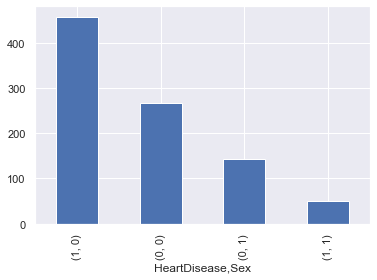

In [52]:
p_sex.plot.bar()

## Distribution of Heart Diseases by Exercise Induce Angina

In [53]:
df_heartdisease_exerciseangina = data_num[['HeartDisease', 'ExerciseAngina']]
df_heartdisease_exerciseangina.groupby('ExerciseAngina').count()

,HeartDisease
ExerciseAngina,
0,547
1,371


In [54]:
p_exerciseangina= df_heartdisease_exerciseangina.value_counts()
p_exerciseangina

HeartDisease  ExerciseAngina
0             0                 355
1             1                 316
              0                 192
0             1                  55
dtype: int64

<AxesSubplot:xlabel='HeartDisease,ExerciseAngina'>

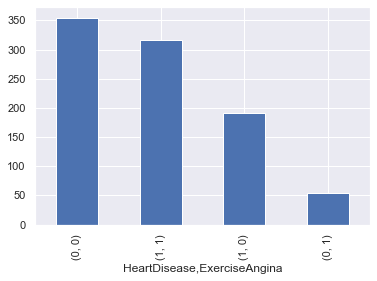

In [55]:
p_exerciseangina.plot.bar()

## Using Age and Chest Pain Type to Predict Heart Disease

In [27]:
data_age_chestpain=data_num[['HeartDisease', 'Age','ChestPainType']]
data_age_chestpain

,HeartDisease,Age,ChestPainType
0,0,40,1
1,1,49,2
2,0,37,1
3,1,48,3
4,0,54,2
...,...,...,...
913,1,45,0
914,1,68,3
915,1,57,3
916,1,57,1


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

y = data_age_chestpain['HeartDisease']

X = data_age_chestpain.drop(["HeartDisease"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size =0.2)

## Using Decision Tree to Predict

In [30]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

age_chestpain_prediction = model.predict(X_test)

age_chestpain_score = accuracy_score(y_test, age_chestpain_prediction)

total_age_chestpain_percentage = age_chestpain_score * 100
print('Age and Type of Chest Pain Accuracy Predicting Heart Disease: '+ str(total_age_chestpain_percentage))

Age and Type of Chest Pain Accuracy Predicting Heart Disease: 73.36956521739131


## Distribution of Heart Diseases by Age

In [38]:
df_heartdisease_age = data_num[['HeartDisease', 'Age']]
df_heartdisease_age.groupby('Age').count()

,HeartDisease
Age,
28,1
29,3
30,1
31,2
32,5
33,2
34,7
35,11
36,6


In [39]:
p_age= df_heartdisease_age.value_counts()
p_age

HeartDisease  Age
0             54     28
1             58     28
              57     26
              61     26
              62     25
                     ..
              31      1
              33      1
              37      1
              73      1
0             28      1
Length: 95, dtype: int64

<AxesSubplot:xlabel='HeartDisease,Age'>

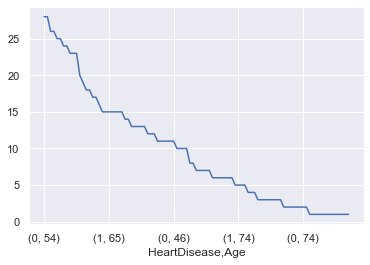

In [42]:
p_age.plot.line()

## Distribution of Heart Diseases by Type of Chest Pain

In [43]:
df_heartdisease_chestpain = data_num[['HeartDisease', 'ChestPainType']]
df_heartdisease_chestpain.groupby('ChestPainType').count()

,HeartDisease
ChestPainType,
0,46
1,173
2,203
3,496


In [44]:
p_chestpain= df_heartdisease_chestpain.value_counts()
p_chestpain

HeartDisease  ChestPainType
1             3                392
0             1                149
              2                131
              3                104
1             2                 72
0             0                 26
1             1                 24
              0                 20
dtype: int64

<AxesSubplot:xlabel='HeartDisease,ChestPainType'>

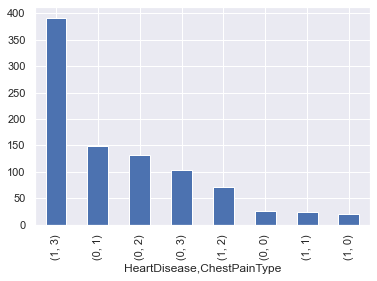

In [45]:
p_chestpain.plot.bar()

## Based on the prediction analysis there is a higher accuracy of predicting heart diseases using age and type of chest pain. More research is necessary using other fields from the data set either individually or  combined. 